In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/Số-liệu-nguồn-gốc-IR.xlsx'

In [4]:
excel = pd.ExcelFile(path)
sheets = excel.sheet_names
print(sheets)

['X', 'class', 'Xtest', 'classtest']


In [5]:
X_train = pd.DataFrame(excel.parse(sheet_name=sheets[0], index_col=0).values)
y_train = excel.parse(sheet_name= sheets[1],index_col=0).values
X_test = pd.DataFrame(excel.parse(sheet_name= sheets[2], index = 0).values)
y_test = excel.parse(sheet_name= sheets[3], index_col = 0, header = None).values

In [6]:
print(X_train)

         0          1          2     ...      1552      1553      1554
0    9.013831   9.029084   9.056118  ...  38.21329  38.27672  38.15857
1    8.813247   8.826152   8.855392  ...  37.25483  37.30854  37.31703
2   10.933540  10.952670  10.973550  ...  41.71160  41.76169  41.67236
3   10.414240  10.426530  10.429380  ...  39.97696  39.99192  39.94454
4    9.478447   9.480355   9.521325  ...  40.30861  40.29305  40.17115
..        ...        ...        ...  ...       ...       ...       ...
95  11.578070  11.598910  11.630060  ...  31.94281  32.00711  31.96472
96  11.014010  11.030500  11.051850  ...  39.70580  39.72363  39.80148
97  10.398300  10.408820  10.435720  ...  36.01064  35.99816  35.99319
98   9.976229   9.986073  10.006563  ...  38.24546  38.18337  38.13934
99  10.998850  11.018510  11.034680  ...  41.42023  41.38044  41.40984

[100 rows x 1555 columns]


In [7]:
X_test = X_test.drop(X_test.columns[0], axis = 1)

In [8]:
print(X_test)

       1        2        3        4     ...     1552     1553     1554     1555
0   10.0886  10.1087  10.1148  10.1384  ...  39.2914  39.2428  39.2153  39.2234
1   10.0268  10.0503   10.071  10.0861  ...  37.9881  37.9944  38.0006  37.9551
2   9.89773  9.91413   9.9373  9.93944  ...  42.8812  42.8685  42.9006  42.9157
3   10.5261  10.5392   10.571  10.5668  ...  40.1007  40.1579  40.2658  40.1858
4   9.59404  9.60943  9.64345   9.6535  ...  34.6394  34.6526  34.6857  34.5997
5   13.2398  13.2509  13.2582  13.2776  ...  38.2916   38.373  38.3254  38.3086
6   11.1029  11.1106  11.1433  11.1487  ...  38.6786  38.7208  38.7893  38.6913
7   13.5288  13.5394  13.5519  13.5689  ...  41.0757   41.121  41.0155  41.1002
8   11.2112  11.2203  11.2442  11.2562  ...  40.5092  40.5224  40.4675  40.5164
9   11.3815  11.4006  11.4047  11.4328  ...  39.3858  39.4154  39.4137  39.3368
10  12.4185  12.4246  12.4463   12.457  ...  40.5024  40.4507  40.4397   40.402
11  10.7942  10.8066  10.8235  10.8468  

In [9]:
y_test.shape

(25, 1)

reduce dimension of data 

In [10]:
pca  = PCA(n_components= 30)

In [11]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

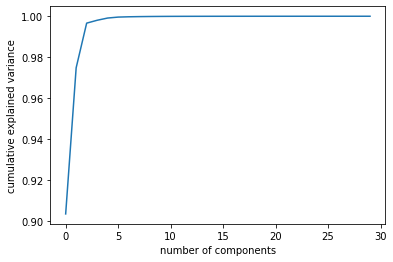

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [13]:
pca  = PCA(n_components= 8*8)
X_train_transform = pca.fit_transform(X_train)

In [14]:
X_test_transform = pca.transform(X_test)

In [15]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [17]:
scaler.fit(X_train_transform)
X_train_scale = scaler.transform(X_train_transform)
X_test_scale = scaler.transform(X_test_transform)

1. Logistic  regression

In [18]:
logist = LogisticRegression()
logist.fit(X_train_scale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions1 = logist.predict(X_test_scale)
print(accuracy_score(y_test, predictions1))
print(confusion_matrix(y_test, predictions1))

2. SVM

In [31]:
svc  = SVC(kernel= 'linear', C  = 100)
svc.fit(X_train_scale, y_train)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
predictions2 = svc.predict(X_test_scale)
print(accuracy_score(y_test, predictions2))
print(confusion_matrix(y_test, predictions2))

0.96
[[5 0 0 0]
 [0 5 0 1]
 [0 0 7 0]
 [0 0 0 7]]


3. DecisionTree classifier

In [38]:
tree = DecisionTreeClassifier()
tree.fit(X_train_scale, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
predictions3 = tree.predict(X_test_scale)
print(accuracy_score(y_test, predictions3))
print(confusion_matrix(y_test, predictions3))

0.68
[[4 0 1 0]
 [0 5 0 1]
 [1 1 4 1]
 [1 2 0 4]]


4. Naive_bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scale, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
predictions4 = gnb.predict(X_test_scale)
print(accuracy_score(y_test, predictions4))
print(confusion_matrix(y_test, predictions4))

0.56
[[4 1 0 0]
 [0 5 0 1]
 [0 1 1 5]
 [1 1 1 4]]


5. KNN k nearest neighbor

In [77]:
from sklearn import neighbors

ngh = neighbors.KNeighborsClassifier(n_neighbors = 5, p = 2, weights = 'distance')
ngh.fit(X_train_scale, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [78]:
predictions5 = ngh.predict(X_test_scale)
print("accuracy: ",  accuracy_score(y_test, predictions5))
print(confusion_matrix(y_test, predictions5))

accuracy:  0.68
[[3 1 1 0]
 [0 4 2 0]
 [0 0 7 0]
 [2 0 2 3]]


6. Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier(n_jobs=-1,random_state=123)
reg.fit(X_train_scale, y_train)
predictions6 = reg.predict(X_test_scale)
print(predictions6)
print("accuracy: ",  accuracy_score(y_test, predictions6))
print(confusion_matrix(y_test, predictions6))

[1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 4 4 4 4 4 2 4]
accuracy:  0.96
[[5 0 0 0]
 [0 6 0 0]
 [0 0 7 0]
 [0 1 0 6]]


7.Adaboost

In [95]:
from sklearn.ensemble import AdaBoostClassifier

svc = SVC(probability=True, kernel='linear')

abc = AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

abc.fit(X_train_scale, y_train)

predictions7 = abc.predict(X_test_scale)
print("accuracy: ",  accuracy_score(y_test, predictions7))
print(confusion_matrix(y_test, predictions7))

accuracy:  0.96
[[5 0 0 0]
 [0 5 0 1]
 [0 0 7 0]
 [0 0 0 7]]


In [97]:
bc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

abc.fit(X_train_scale, y_train)

predictions8 = abc.predict(X_test_scale)
print("accuracy: ",  accuracy_score(y_test, predictions8))
print(confusion_matrix(y_test, predictions7))

accuracy:  0.92
[[5 0 0 0]
 [0 5 0 1]
 [0 0 7 0]
 [0 0 0 7]]
